# Flight Price Prediction
## Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.
##### Size of training set: 10683 records
##### Size of test set: 2671 records
### FEATURES:
Airline: The name of the airline.
Date_of_Journey: The date of the journey
Source: The source from which the service begins.
Destination: The destination where the service ends.
Route: The route taken by the flight to reach the destination.
Dep_Time: The time when the journey starts from the source.
Arrival_Time: Time of arrival at the destination.
Duration: Total duration of the flight.
Total_Stops: Total stops between the source and destination.
Additional_Info: Additional information about the flight
Price: The price of the ticket
 
You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket.


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

# Load dataset

In [3]:
df_train=pd.read_excel(r"C:\Users\dell\Desktop\Data Trained Projects\Project 6\Data_Train Flight.xlsx")
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_test=pd.read_excel(r"C:\Users\dell\Desktop\Data Trained Projects\Project 6\Test_set Flight.xlsx")
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Shape of the dataset

In [5]:
df_train.shape

(10683, 11)

The dataset contain 10683 rows and 11 columns

In [6]:
df_test.shape

(2671, 10)

The dataset contain 2671 rows and 10 columns, as doesnot have "price" label in the dataset

# Check the concise summary of the dataframe

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


# Checking for null values

In [9]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

# Check uniqueness in features

In [11]:
df_train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [12]:
df_train.dropna(inplace=True)

In [13]:
df_train.shape

(10682, 11)

# EDA

#### Time taken by plane to reach destination is called Duration. It is the differnce betwwen Departure Time and Arrival time

In [14]:
duration = list(df_train["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" 
        else:
            duration[i] = "0h " + duration[i]      

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 
    
df_train["duration_hours"] = duration_hours
df_train["duration_mins"] = duration_mins
df_train.drop(["Duration"], axis = 1, inplace = True)

In [15]:
duration = list(df_test["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" 
        else:
            duration[i] = "0h " + duration[i]      

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 
    
df_test["duration_hours"] = duration_hours
df_test["duration_mins"] = duration_mins
df_test.drop(["Duration"], axis = 1, inplace = True)

#### Convert date in date time format

In [16]:
df_train["day_of_journey"]=pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.day
df_train["month_of_journey"]=pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.month
df_train["dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train["dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute
df_train["arrival_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train["arrival_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute

In [17]:
df_test["day_of_journey"]=pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_test["month_of_journey"]=pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.month
df_test["dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test["arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute

Since we have converted Date_of_Journey, Dep_Time, Arrival_Time column into integers, Now we can drop as it is of no use.

In [18]:
df_train.drop(["Date_of_Journey"], axis = 1, inplace = True)
df_train.drop(["Dep_Time"], axis = 1, inplace = True)
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [19]:
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)
df_test.drop(["Dep_Time"], axis = 1, inplace = True)
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [20]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,duration_hours,duration_mins,day_of_journey,month_of_journey,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4,45,1,3,16,50,21,35


In [21]:
df_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,duration_hours,duration_mins,day_of_journey,month_of_journey,dep_hour,dep_min,arrival_hour,arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,10,55,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,4,0,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,23,45,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,13,0,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,2,50,24,6,23,55,2,45


# Handling categorical data
We can find many ways to handle categorical data. Some of them categorical data are,

Nominal data --> data are not in any order --> OneHotEncoder is used in this case Ordinal data --> data are in order --> LabelEncoder is used in this case

In [22]:
df_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

From graph we can see that Jet Airways Business have the highest Price.
Apart from the first Airline almost all are having similar median

# Airline vs Price

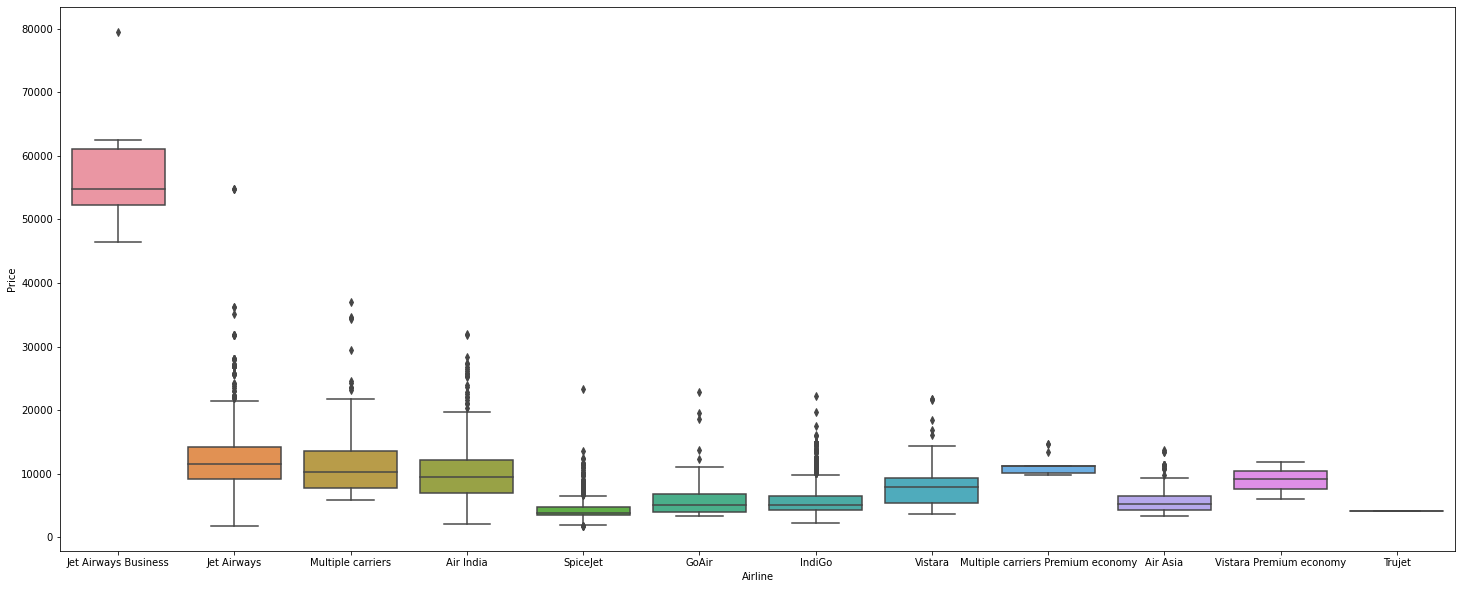

In [23]:
plt.figure(figsize=(25,10))
sns.boxplot(y = "Price", x = "Airline", data = df_train.sort_values("Price", ascending = False))
plt.show()

## As Airline is Nominal Categorical data we will perform OneHotEncoding

In [24]:
airline_train=df_train["Airline"]
airline_train=pd.get_dummies(airline_train, drop_first= True)
airline_train.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [25]:
airline_test=df_test["Airline"]
airline_test=pd.get_dummies(airline_test, drop_first= True)
airline_test.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [26]:
df_train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

# Source vs Price

<Figure size 1080x720 with 0 Axes>

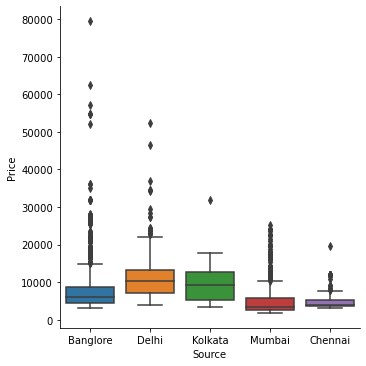

In [27]:
plt.figure(figsize=(15,10))
sns.catplot(y = "Price", x = "Source", data = df_train.sort_values("Price", ascending = False), kind="box")
plt.show()

As Source is Nominal Categorical data we will perform OneHotEncoding

In [28]:
source_train=df_train["Source"]
source_train=pd.get_dummies(source_train, drop_first= True)
source_train.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [29]:
source_test=df_test["Source"]
source_test=pd.get_dummies(source_test, drop_first= True)
source_test.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [30]:
df_train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

As Destination is Nominal Categorical data we will perform OneHotEncoding

In [31]:
destination_train=df_train["Destination"]
destination_train=pd.get_dummies(destination_train, drop_first = True)
destination_train.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
destination_test=df_test["Destination"]
destination_test=pd.get_dummies(destination_test, drop_first = True)
destination_test.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [33]:
df_train["Route"]

0                                BLR → DEL
1                    CCU → IXR → BBI → BLR
2                    DEL → LKO → BOM → COK
3                          CCU → NAG → BLR
4                          BLR → NAG → DEL
5                                CCU → BLR
6                          BLR → BOM → DEL
7                          BLR → BOM → DEL
8                          BLR → BOM → DEL
9                          DEL → BOM → COK
10                         DEL → BLR → COK
11                               CCU → BLR
12                               MAA → CCU
13                         CCU → BOM → BLR
14                               CCU → BLR
15                   DEL → AMD → BOM → COK
16                         DEL → PNQ → COK
17                         DEL → BOM → COK
18                   DEL → CCU → BOM → COK
19                         DEL → BOM → COK
20                         DEL → BOM → COK
21                         BLR → COK → DEL
22                               BLR → DEL
23         

Additional_Info contains almost 80% no_info. Route and Total_Stops are related to each other

In [34]:
df_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)
df_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [35]:
df_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

- As this is case of Ordinal Categorical type we perform LabelEncoder
- Here Values are assigned with corresponding keys

In [36]:
df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [37]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,duration_hours,duration_mins,day_of_journey,month_of_journey,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,0,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,13302,4,45,1,3,16,50,21,35


# Concatenate dataframe --> df + Airline + Source + Destination

In [38]:
train_df = pd.concat([df_train, airline_train, source_train, destination_train], axis = 1)
test_df = pd.concat([df_test, airline_test, source_test, destination_test], axis = 1)

In [39]:
train_df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
test_df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [40]:
train_df.head()

,Total_Stops,Price,duration_hours,duration_mins,day_of_journey,month_of_journey,dep_hour,dep_min,arrival_hour,arrival_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,2,50,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,7,25,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,19,0,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,25,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,4,45,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
test_df.head()

,Total_Stops,duration_hours,duration_mins,day_of_journey,month_of_journey,dep_hour,dep_min,arrival_hour,arrival_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,10,55,6,6,17,30,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,4,0,12,5,6,20,10,20,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,23,45,21,5,19,15,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,13,0,21,5,8,0,21,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,2,50,24,6,23,55,2,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [42]:
train_df.shape

(10682, 30)

In [43]:
test_df.shape

(2671, 28)

# Removing Outliers

In [44]:
from scipy.stats import zscore

In [45]:
z= np.abs(zscore(train_df))
z.shape

(10682, 30)

In [46]:
threshold=3
# index number
print(np.where(z>3))

(array([    0,     4,     5, ..., 10676, 10680, 10680], dtype=int64), array([29, 29, 17, ..., 17, 19, 29], dtype=int64))


In [47]:
len(np.where(z>4)[0])

1497

In [48]:
train_df_new=train_df[(z<4).all(axis=1)]
print(train_df.shape)
print(train_df_new.shape)

(10682, 30)
(9616, 30)


In [49]:
loss_percent=(10682-9616)/10682*100
print(loss_percent, '%')

9.979404605879049 %


In [50]:
X = train_df.loc[:, train_df.columns!='Price']
X.head()

,Total_Stops,duration_hours,duration_mins,day_of_journey,month_of_journey,dep_hour,dep_min,arrival_hour,arrival_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,2,50,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7,25,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,19,0,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,5,25,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,4,45,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [51]:
y = train_df.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [76]:
z1= np.abs(zscore(test_df))
z1.shape

(2671, 28)

In [82]:
threshold=4
# index number
print(np.where(z1>4))

(array([  17,   45,   45,   54,   54,   59,   64,   78,   81,   82,   86,
         86,  127,  138,  163,  169,  169,  185,  191,  195,  195,  203,
        203,  209,  223,  223,  247,  272,  274,  279,  283,  293,  295,
        301,  302,  302,  325,  325,  327,  340,  351,  363,  364,  384,
        393,  396,  415,  433,  433,  443,  443,  453,  470,  472,  472,
        494,  494,  495,  495,  504,  504,  534,  541,  541,  580,  589,
        599,  600,  603,  604,  604,  604,  626,  646,  646,  647,  650,
        665,  667,  667,  669,  697,  708,  730,  731,  732,  732,  733,
        733,  739,  739,  764,  764,  767,  773,  779,  783,  792,  795,
        795,  802,  807,  807,  813,  846,  846,  849,  855,  866,  866,
        868,  874,  874,  876,  881,  889,  906,  906,  918,  918,  919,
        932,  932,  942,  942,  957,  964,  970,  985,  993,  993,  995,
        998, 1003, 1018, 1030, 1030, 1044, 1054, 1060, 1065, 1102, 1129,
       1129, 1142, 1159, 1169, 1169, 1177, 1177, 1

In [83]:
len(np.where(z1>4)[0])

333

In [85]:
test_df_new=test_df[(z1<4).all(axis=1)]
print(test_df.shape)
print(test_df_new.shape)

(2671, 28)
(2419, 28)


In [86]:
loss_percent=(2671-2419)/2671*100
print(loss_percent, '%')

9.43466866342194 %


# Ploting CORRELATION using HEATMAP

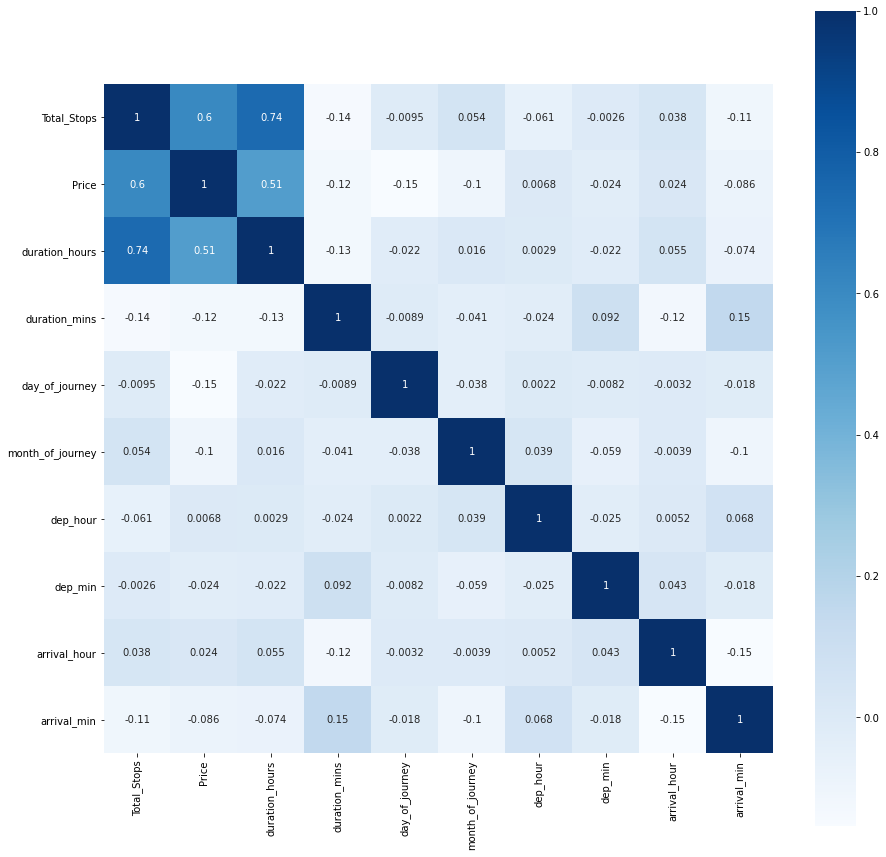

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(), annot=True, square=True, cmap = "Blues")
plt.show()

In [73]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Split train and test dataset

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10000)

In [55]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8545, 29), (8545,), (2137, 29), (2137,))

In [56]:
models = []
scores = []

# Modeling

### Lasso

In [57]:
model = Lasso()
model.fit(X_train, y_train)
print('Train Score : ',model.score(X_train, y_train))
print('Test Score : ',model.score(X_test, y_test))

Train Score :  0.6219954168339276
Test Score :  0.6268500072604806


#### Hyperparameter Tuning Lasso

In [58]:
param_grid = {'alpha' : [0.0001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
model = Lasso()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
lasso_score = grid_search.score(X_test, y_test)

print('Test Score :',lasso_score)
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score :',grid_search.best_score_)

models.append('Lasso')
scores.append(lasso_score)

Test Score : 0.6263696429624861
Best Parameters : {'alpha': 0.0001}
Best CV Score : 0.6147774686588844


### RandomForestRegressor

In [59]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('Train Score : ',model.score(X_train, y_train))
print('Test Score : ',model.score(X_test, y_test))

Train Score :  0.9539053838535267
Test Score :  0.8232591291024034


#### Hyperparameter RandomForestRegressor

In [60]:
param_grid = {'max_depth' : [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
model = RandomForestRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
rf_score = grid_search.score(X_test, y_test)

print('Test Score :',rf_score)
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score :',grid_search.best_score_)

models.append('RandomForestRegressor')
scores.append(rf_score)

Test Score : 0.8432469369634868
Best Parameters : {'max_depth': 15}
Best CV Score : 0.8004272629475105


### GradientBoostingRegressor

In [61]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
print('Train Score : ',model.score(X_train, y_train))
print('Test Score : ',model.score(X_test, y_test))

Train Score :  0.7827831769508933
Test Score :  0.7735396522385507


#### Hyperparameter tuning GradientBoostingRegressor

In [62]:
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 20, 40, 60, 85, 100]}
model = GradientBoostingRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
gb_score = grid_search.score(X_test, y_test)

print('Test Score :',gb_score)
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score :', grid_search.best_score_)

models.append('Gradient Boost')
scores.append(gb_score)

Test Score : 0.8405780462373356
Best Parameters : {'max_depth': 6}
Best CV Score : 0.8127950308939192


### ExtraTreesRegressor

In [63]:
model = ExtraTreesRegressor()
model.fit(X_train, y_train)
print('Train Score : ',model.score(X_train, y_train))
print('Test Score : ',model.score(X_test, y_test))

Train Score :  0.9705843067219367
Test Score :  0.7887753213970168


#### Hyperparameter tuning ExtraTreesRegressor

In [64]:
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 20, 40, 60, 85, 100]}
model = ExtraTreesRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
et_score = grid_search.score(X_test, y_test)

print('Test Score :',et_score)
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score :', grid_search.best_score_)

models.append('ExtraTreesRegressor')
scores.append(et_score)

Test Score : 0.8112420128185995
Best Parameters : {'max_depth': 9}
Best CV Score : 0.7910075971409132


### DecisionTreeRegressor

In [65]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print('Train Score : ',model.score(X_train, y_train))
print('Test Score : ',model.score(X_test, y_test))

Train Score :  0.970584454273146
Test Score :  0.7380848866781362


#### Hyperparameter tuning DecisionTreeRegressor

In [66]:
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 20, 40, 60, 85, 100]}
model = DecisionTreeRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
dt_score = grid_search.score(X_test, y_test)

print('Test Score :',dt_score)
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score :',grid_search.best_score_)

models.append('DecisionTreeRegressor')
scores.append(dt_score)

Test Score : 0.7593484340998555
Best Parameters : {'max_depth': 9}
Best CV Score : 0.738408201561221


In [67]:
df_result = pd.DataFrame({'Model' : models, 'Score' : scores})
df_result

,Model,Score
0,Lasso,0.626370
1,RandomForestRegressor,0.843247
2,Gradient Boost,0.840578
3,ExtraTreesRegressor,0.811242
4,DecisionTreeRegressor,0.759348


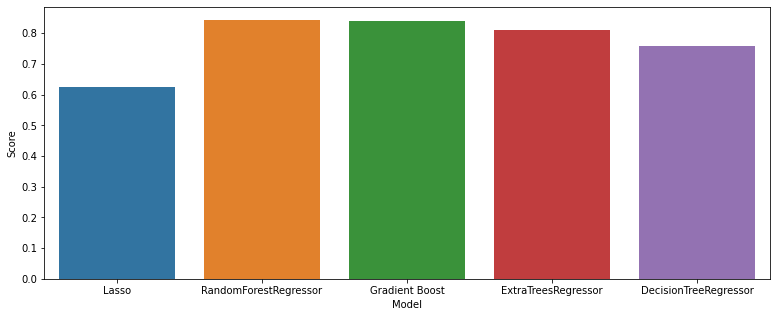

In [69]:
plt.figure(figsize=(13,5))
sns.barplot(x=df_result.Model, y=df_result.Score)
plt.show()

# Save the model for regression

In [72]:
import joblib
joblib.dump(models[1],'Flight Price Prediction.pkl')

['Flight Price Prediction.pkl']